<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 212: Data Science Programming I</h2>
<h3 style = "text-align:center">Assignment 3</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, May 13, 2018</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR NAME BELOW</h3>

### NAME: Linh Mai


### A. Assignment Overview
This assignment provides the opportunity for you to practice with the capabilities of handling with external data in Python. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation. Text font size should be either 11 or 12 points.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write a good comment for each variable, each method, each control branch, and each loop.
2. Use appropriate indentations to indicate control flows and blocks of code. 
3. Your method comments must mention the purpose of each parameter, and must be grammatically correct. 
4. Each line must be less than 80 characters long including tabs and spaces. 
5. Put a blank space before and after every operator. 
6. When breaking up a long line, break it before an operator, not after. 

### G. Data Sets

This assignment needs the data sets specified in the questions. 

### H. Answer the following questions

#### Question 1:

Wikipedia has a Webpage: (https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population): *List of countries by past and future population*. On this page, there are three tables containing the estimated populations from 1950 to 2050 for all the countries. Read the description on the Webpage to understand the information in the tables. Follow the instructions below at each step and answer the questions to complete this question:
- Download the Webpage as an HTML file in your disk. 
- Read in the tables using Pandas' `read_html` method. Answer the following question:
 * How many tables have you read in?
- Show the first 5 rows of the DataFrame correpsonding to the table "Estimates between the years 1950 and 1980 (in thousands)"
- How many countries does the Wikipedia page list their populations?
- Create a DataFrame containing all the data from the population tables. I.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. 
- For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result.
![](assignment3-question1-population.png)
- For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result. 
![](assignment3-question1-aag.png)

In [186]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

In [211]:
tables = pd.read_html('countries_wiki.htm')
print("The number of tables that I read in is: " + str(len(tables)))


The number of tables that I read in is: 4


In [188]:
tables[0].columns = ['Country', '1950', '1955', '1955AAG', '1960', '1960AAG',
       '1965', '1965AAG', '1970', '1970AAG', '1975', '1975AAG', '1980', '1980AAG']
print("The first 5 rows of the DataFrame coressponding to the table 'Esimates between the years 1950 and 1980 (in thousands)': ")
tables[0].head(5)

The first 5 rows of the DataFrame coressponding to the table 'Esimates between the years 1950 and 1980 (in thousands)': 


,Country,1950,1955,1955AAG,1960,1960AAG,1965,1965AAG,1970,1970AAG,1975,1975AAG,1980,1980AAG
0,Afghanistan,8151,8892,1.76,9830,2.03,10998,2.27,12431,2.48,14133,2.60,15045,1.26
1,Albania,1228,1393,2.56,1624,3.12,1884,3.02,2157,2.74,2402,2.17,2672,2.16
2,Algeria,8893,9842,2.05,10910,2.08,11964,1.86,13932,3.09,16141,2.99,18807,3.10
3,American Samoa,20,20,0.72,21,0.20,25,4.23,28,2.08,30,1.68,33,1.81
4,Andorra,7,7,0.04,9,6.28,14,10.17,20,7.49,27,6.32,34,4.81


In [212]:
print("The number of countries that are in each table is: " +str(len(tables[0].index)-1))

The number of countries that are in each table is: 227


In [190]:
tables[1].columns = ['Country', '1985', '1985AAG', '1990', '1990AAG', '1995',
       '1995AAG', '2000', '2000AAG', '2005', '2005AAG', '2010', '2010AAG', '2015', '2015AAG']
tables[2].columns = ['Country', '2020', '2020AAG', '2025', '2025AAG', '2030',
       '2030AAG', '2035', '2035AAG', '2040', '2040AAG', '2045', '2045AAG', '2050', '2050AAG']


In [191]:
tables_concat = pd.concat([tables[0],tables[1].iloc[:, 1:],tables[2].iloc[: ,1:]], axis=1) 


In [192]:
top_10 = tables_concat.iloc[tables_concat['1950'].sort_values(ascending = False)[1:11].index]

In [193]:
top_10_population = top_10[['Country', '1950', '1955', '1960', '1965',
        '1970', '1975', '1980','1985', '1990', '1995', '2000', '2005', '2010', '2015',
       '2020', '2025','2030','2035','2040','2045','2050']]

In [194]:
top_10_population.set_index('Country', inplace = True)

In [195]:
to_plot = top_10_population.T


In [196]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Top 10 most populous countries in 1950 and their population between 1950 and 2050')

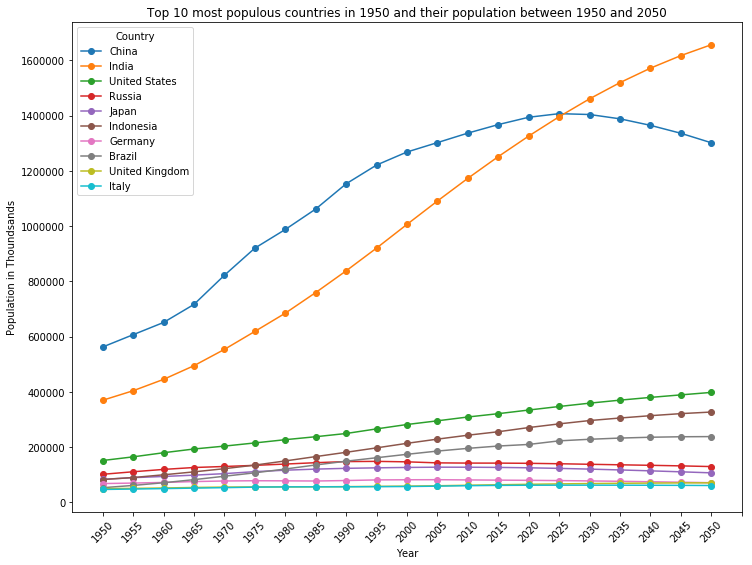

In [197]:
xlabel = ['1950', '1955', '1960', '1965',
        '1970', '1975', '1980','1985', '1990', '1995', '2000', '2005', '2010', '2015',
       '2020', '2025','2030','2035','2040','2045','2050']
figure1 = to_plot.plot(figsize = (12,9), marker = 'o')
figure1.set_ylabel('Population in Thoundsands')
figure1.set_xlabel('Year')
figure1.set_xticks(range(22))
figure1.set_xticklabels(xlabel, rotation =45)
figure1.set_title("Top 10 most populous countries in 1950 and their population between 1950 and 2050")

In [198]:
top_10_population_increase = top_10[['Country','1955AAG','1960AAG',
       '1965AAG','1970AAG','1975AAG','1980AAG',
      '1985AAG','1990AAG','1995AAG',
       '2000AAG', '2005AAG','2010AAG', '2015AAG',
      '2020AAG', '2025AAG', '2030AAG',
       '2035AAG', '2040AAG','2045AAG','2050AAG']]
top_10_population_increase.set_index('Country', inplace = True)


In [199]:
to_plot2 = top_10_population_increase.T

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Top 10 most populous countries in 1950 and their annual growth for each 5 years between 1950 and 2050')

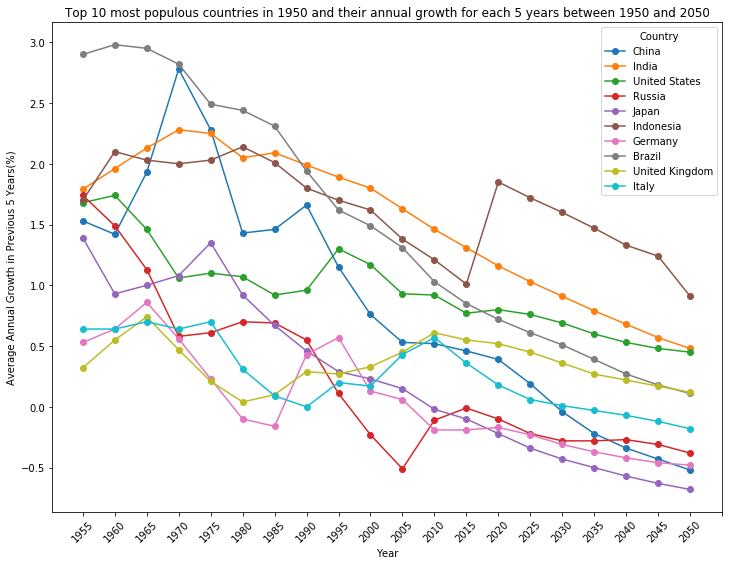

In [201]:
import numpy as np
xlabel2 = ['1955', '1960', '1965',
        '1970', '1975', '1980','1985', '1990', '1995', '2000', '2005', '2010', '2015',
       '2020', '2025','2030','2035','2040','2045','2050']
figure2 = to_plot2.plot(figsize = (12,9), marker = 'o')
figure2.set_ylabel('Average Annual Growth in Previous 5 Years(%)')
figure2.set_xlabel('Year')
figure2.set_xticks(range(21))
figure2.set_xticklabels(xlabel2, rotation =45)
figure2.set_title("Top 10 most populous countries in 1950 and their annual growth for each 5 years between 1950 and 2050")

#### Question 2:
The file `nobelprize-laureate.json` is a JSON file containing the information about Nobel Prize laureates. Create a Pandas DataFrame from the JSON file and complete the following steps:
- Answer the question: How many countries does this data set represent as the Nobel Prize laureates's birth countries?
- Plot the top-20 birth countries in a bar chart showing the country names and the number of laureats born in the countries.
![](assignment3-question2-bornCountries-bar.png)
- Plot a bar chart showing the numbers of countries where the laureates were born since 1901. 
![](assignment3-question2-bornCountry-change.png)

In [202]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline


In [203]:
import json
data = json.load(open('nobelprize-laureate.json'))
laureate_df = pd.DataFrame(data['laureates'])
prize_df = pd.DataFrame([rec['prizes'][0] for rec in data['laureates']])
laureate_year_df = pd.concat([laureate_df, prize_df], axis = 1)
print("Number countries represents as the Nobel Prize laureates's birth countries is : " +str(laureate_year_df.bornCountry.nunique()))
bornCountry = laureate_year_df.bornCountry.value_counts().head(20)
bornCountry

Number countries represents as the Nobel Prize laureates's birth countries is : 121


USA                     263
United Kingdom           83
Germany                  63
France                   51
Sweden                   29
Japan                    25
the Netherlands          18
Canada                   18
Russia                   17
Switzerland              17
Italy                    17
Austria                  14
Norway                   12
China                    11
Denmark                  11
Scotland                 11
Australia                10
Belgium                   9
South Africa              9
Germany (now Poland)      8
Name: bornCountry, dtype: int64

Text(0.5,1,'Top 20 most countries with the highest number of laureates')

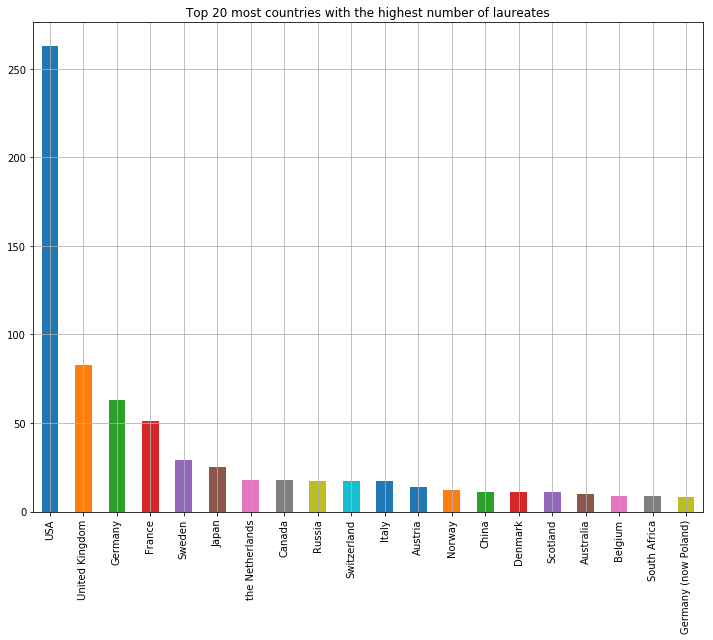

In [204]:
import numpy as np
figure3.set_yticks(np.arange(0,300,10))
figure3 = bornCountry.plot.bar(figsize = (12,9), grid = True)
figure3.set_title("Top 20 most countries with the highest number of laureates")

In [205]:
laureate_df.shape

(922, 13)

In [206]:
prize_df.shape

(922, 6)

In [207]:
new = laureate_year_df[['bornCountry', 'year']].copy()
new_no_duplicate = new.drop_duplicates()
new_count = new_no_duplicate['year'].value_counts()
new_df = pd.DataFrame({'year':new_count.index, 'value':new_count.values})
new_df.set_index('year',inplace = True)
df_sort = new_df.sort_index()


Text(0.5,1,"The Changes of the Number of Laureates' Birth Countries ")

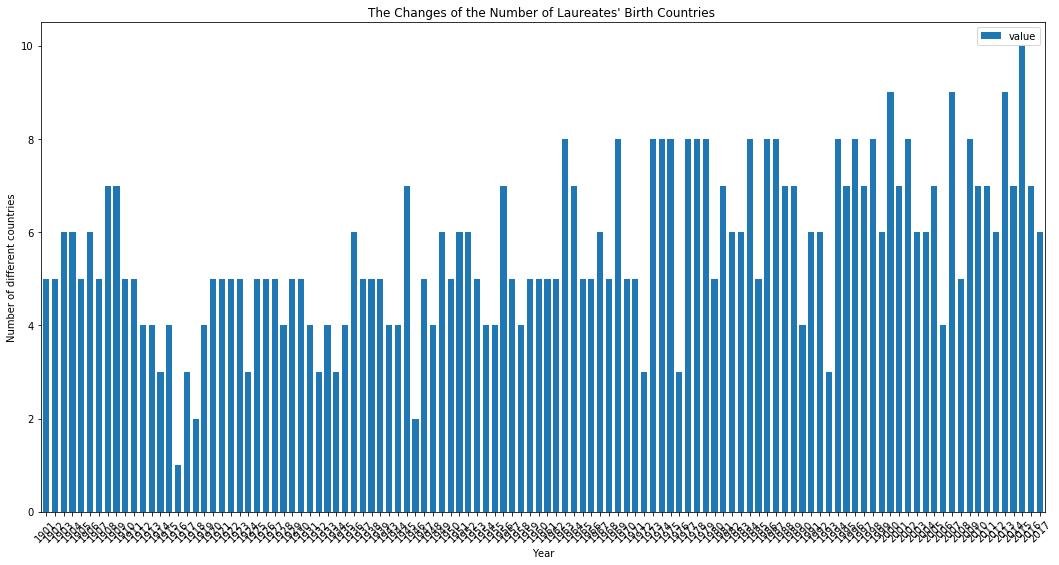

In [208]:
import numpy as np
from matplotlib import pyplot as plt
xlabel3 = ['1905', '1911', '1916',
         '1921', '1926', '1931','1936', '1944', '1949', '1954', '1959',
           '1964','1969','1974','1979','1984',
          '1989','1994','1999','2004','2009', '2014']
figure5 = df_sort.plot.bar(figsize = (18,9), width = 0.7, rot = 45)
figure5.set_xlabel('Year')
figure5.set_ylabel('Number of different countries')
figure5.set_title("The Changes of the Number of Laureates' Birth Countries ")
#figure5.set_xticks(range(22))
#figure5.set_xticklabels(xlabel3, rotation =45)
